# Optimal resource allocation in microbial growth
Sacha PSALMON, Baptiste SCHALL, Enzo ISNARD and Guillaume GROS

<img src="maintenance.png" width=400>

[Thumbnail](maintenance.png)

Microorganisms must assign the resources available in the environment to different cellular functions. In nature, it is assumed that bacteria have evolved in a way that their resource allocation strategies maximize their biomass. Consider the simple resource allocation mathematical model

$$ \begin{array}{rcl}
\dot{p} &=& E_m m - (p+1) v_R(p,r), \\
\dot{r} &=& (\alpha r_{max}-r) v_R(p,r), \\
\dot{m} &=& ((1-\alpha) r_{max}-m) v_R(p,r),
\end{array} $$

where $p$, $r$, $m$ and $q$ are the mass fractions of: precursor metabolites, the gene expression machinery (ribosomes, RNA polymerase...), the metabolic machinery (enzymes, transporters...) and the housekeeping machinery respectively. The microbial growth rate is defined as $v_R(p,r) = \frac{p(r-r_{min})}{K+p}$. Constants $E_M$, $r_{max}$, $r_{min}$ and $K$ are positive. Maximizing the bacterial biomass is equivalent to maximizing the integral of the growth rate over a fixed time window $[0,T]$. Thus, the cost function of the optimal control problem can be written as

$$J(\alpha) = \int_0^T v_R(p,r) \, \mathrm{d}t \to \max $$

with the resource allocation parameter (i.e. the control) constrained to $\alpha(t) \in [0,1]$.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

import numpy as np
import math
import os,shutil
!pygmentize ./problem.cpp

// +++DRAFT+++ This class implements the OCP functions
// It derives from the generic class bocop3OCPBase
// OCP functions are defined with templates since they will be called
// from both the NLP solver (double arguments) and AD tool (ad_double arguments)
//#pragma once

#include <OCP.h>
// ///////////////////////////////////////////////////////////////////


template <typename Variable>
void OCP::finalCost(double initial_time, double final_time, const Variable *initial_state, const Variable *final_state, const Variable *parameters, const double *constants, Variable &final_cost)
{
  // maximize the volume of the bacteria
  final_cost = -final_state[3];
}


template <typename Variable>
void OCP::dynamics(double time, const Variable *state, const Variable *control, const Variable *parameters, const double *constants, Variable *state_dynamics)
{
  
    Variable p = state[0];
    Variable r = state[1];
    Variable m = state[2];
    Variable V = state[3];
    Variable u = control[0];
    

In [2]:
import bocop
problem1_path = "." # using local problem definition
bocop.build(problem1_path, cmake_options = '-DCMAKE_CXX_COMPILER=g++')

[EXEC] > ['cmake -DCMAKE_BUILD_TYPE=Debug -DPROBLEM_DIR=/home/caillau/gallery/examples/bacteria -DCPP_FILE=problem.cpp  -DCMAKE_CXX_COMPILER=g++  /home/caillau/.conda/envs/ct-gallery/lib/python3.7/site-packages/bocop']
>	-- The C compiler identification is GNU 7.5.0
>	-- The CXX compiler identification is GNU 9.3.0
>	-- Detecting C compiler ABI info
>	-- Detecting C compiler ABI info - done
>	-- Check for working C compiler: /home/caillau/.conda/envs/ct-gallery/bin/x86_64-conda-linux-gnu-cc - skipped
>	-- Detecting C compile features
>	-- Detecting C compile features - done
>	-- Detecting CXX compiler ABI info
>	-- Detecting CXX compiler ABI info - done
>	-- Check for working CXX compiler: /usr/bin/g++ - skipped
>	-- Detecting CXX compile features
>	-- Detecting CXX compile features - done
>	-- Problem path: /home/caillau/gallery/examples/bacteria
>	-- Using CPPAD found at /home/caillau/.conda/envs/ct-gallery/include/cppad/..
>	-- Using IPOPT found at /home/caillau/.conda/envs/ct-galle

0

In [3]:
path_def = './def'
fileList = os.listdir(path_def)
for file in os.listdir(path_def):
    if file.endswith('.def'):
        shutil.copyfile(os.path.join(path_def,file), os.path.join(problem1_path,'problem.def'))
        sol_name = file.replace('.def','.sol')
        bocop.run(problem1_path, graph=0)
        os.rename("problem.sol",sol_name)

Executing bocop ... 
Done
Executing bocop ... 
Done
Executing bocop ... 
Done
Executing bocop ... 
Done


## Optimal resource allocation

Loading solution:  ./problem1.sol


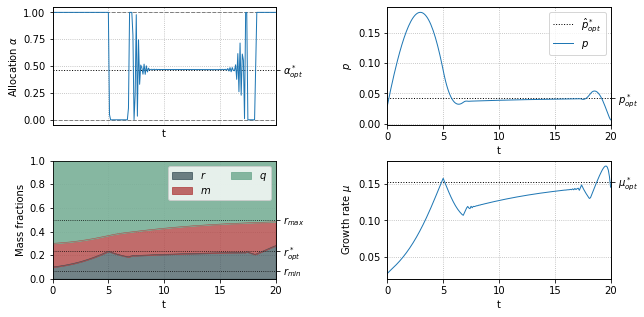

In [4]:
rmin = 0.07
rmax = 0.5
umin = rmin/rmax
Em = 0.6; K = 0.003
param = [Em,K,rmax,rmin]

popt = np.sqrt(K*Em)
f = popt/(K + popt)*(popt+1)
uopt = (Em + f*rmin/rmax)/(Em + f)
ropt = uopt*rmax
mopt = (1-uopt)*rmax
muopt = popt/(K + popt)*(ropt-rmin)

solution = bocop.readSolution("./problem1.sol")
t = solution.time_steps
p = solution.state[0]
r = solution.state[1]
m = solution.state[2]
V = solution.state[3]
u = solution.control[0]
q = 1 - r - m
mu = p*(r-rmin)/(K + p)

t0 = t[0]; t1 = t[-1]

plt.figure(0, figsize=(10,5))
plt.subplot(221)
plt.subplots_adjust(hspace=0.3, wspace=0.5)

plt.grid(linestyle='dotted')
ax = plt.gca()
plt.xlabel('t')
plt.ylabel('Allocation $\\alpha$')
plt.plot([t0,t1],[0,0],linewidth=1,color='grey',linestyle='--')
plt.plot([t0,t1],[1,1],linewidth=1,color='grey',linestyle='--')
plt.plot([t0,t1],[uopt,uopt],linewidth=1, linestyle='dotted', color='black',label='$\\alpha^*_{opt}$')
plt.plot(t[1:],u,linewidth=1,label='$\\alpha$')
ax.set_xlim(t0,t1)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
plt.tick_params(axis='y', which='minor', labelleft='off', labelright='on')
plt.yticks([uopt], ['$\\alpha^*_{opt}$'])

plt.subplot(222)
plt.grid(linestyle='dotted')
ax = plt.gca()
plt.plot([t0,t1],[popt,popt],linewidth=1, linestyle='dotted', color='black',label='$\hat p^*_{opt}$')
plt.plot(t, p, linewidth=1, label='$p$')
plt.legend()
ax.set_xlim(t0,t1)
plt.xlabel('t')
plt.ylabel('$p$')
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
plt.tick_params(axis='y', which='minor', labelleft='off', labelright='on')
plt.yticks([popt], ['$p^*_{opt}$'])

plt.subplot(223)
plt.grid(linestyle='dotted')
plt.xlabel('t')
plt.ylabel('Mass fractions')
ax = plt.gca()
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
plt.tick_params(axis='y', which='minor', labelleft='off', labelright='on')
plt.yticks([rmin,ropt,rmax], ['$r_{min}$','$r^*_{opt}$','$r_{max}$'])
ax.set_xlim(t[0],t[-1])
plt.fill_between(t, r, color='#374e55', label='$r$', alpha=0.7)
plt.fill_between(t, r, r+m, color='#b24746', label='$m$', alpha=0.8)
plt.fill_between(t, r+m, 1, color='#79af97', label='$q$', alpha=0.9)
plt.plot(t, r, color='#374e55',linewidth=0.5)
plt.plot(t, r+m, color='#b24746',linewidth=0.5)
plt.grid(linestyle='dotted',color='black')
plt.legend(ncol = 2)

plt.subplot(224)
plt.grid(linestyle='dotted')
plt.xlabel('t')
plt.ylabel('Growth rate $\mu$')
ax = plt.gca()
plt.plot([t0,t1],[muopt,muopt],linewidth=1, linestyle='dotted', color='black',label='$\mu^*_{opt}$')
plt.plot(t,mu,linewidth=1,label='$\mu(p,r)$')
ax.set_xlim(t0,t1)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
plt.tick_params(axis='y', which='minor', labelleft='off', labelright='on')
plt.yticks([muopt], ['$\mu^*_{opt}$'])

plt.show()

## Comparison between the optimal and naive method

(Naive method: $\alpha(t)$ constant for the interval $[0,T]$)

Loading solution:  ./naiveproblem.sol


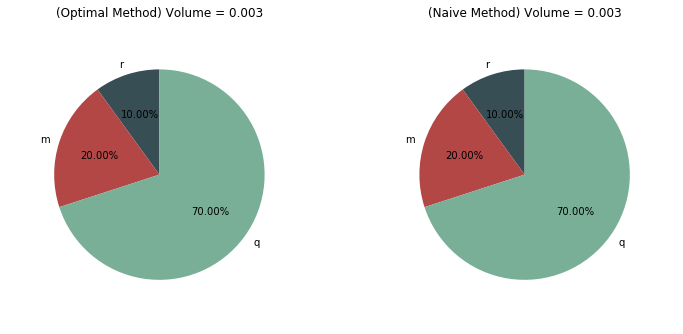

In [5]:
naivesol = bocop.readSolution("./naiveproblem.sol")

length=len(solution.state[1])

langs=['r','m','q']
colors = ["#374e55","#b24746", "#79af97"]

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

def update(frame):
    ax1.clear()
    ax2.clear()
    r=solution.state[1][frame]
    m=solution.state[2][frame]
    q=1-r-m
    
    rn=naivesol.state[1][frame]
    mn=naivesol.state[2][frame]
    qn=1-rn-mn
    
    ax1.pie([r,m,q], colors=colors, labels=langs, autopct='%1.2f%%',startangle=90,radius=math.sqrt(solution.state[3][frame])*3+0.7)
    title1='(Optimal Method) Volume = '+str(solution.state[3][frame])
    ax1.set_title(title1)
    
    ax2.pie([rn,mn,qn], colors=colors, labels=langs, autopct='%1.2f%%',startangle=90,radius=math.sqrt(naivesol.state[3][frame])*3+0.7)
    title2='(Naive Method) Volume = '+str(naivesol.state[3][frame])
    ax2.set_title(title2)

ani = FuncAnimation(fig, update, frames=range(length),interval=10, repeat=False)

FFwriter= animation.FFMpegWriter(fps=120)

ani.save('./images/comparison.mp4',writer=FFwriter)
HTML(ani.to_html5_video())

## Optimal resource allocation during a nutrient shift

Loading solution:  ./problem2.sol


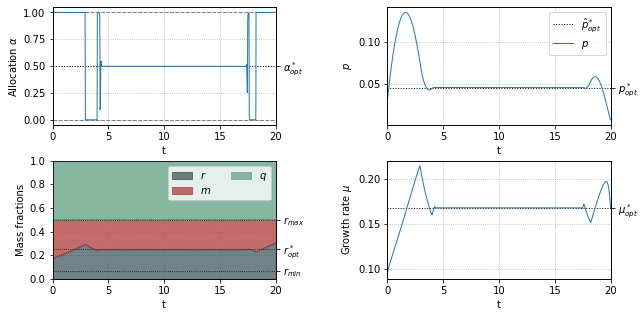

In [6]:
rmin = 0.07
rmax = 0.5
umin = rmin/rmax
Em = 0.7; K = 0.003
param = [Em,K,rmax,rmin]

popt = np.sqrt(K*Em)
f = popt/(K + popt)*(popt+1)
uopt = (Em + f*rmin/rmax)/(Em + f)
ropt = uopt*rmax
mopt = (1-uopt)*rmax
muopt = popt/(K + popt)*(ropt-rmin)

solution = bocop.readSolution("./problem2.sol")
t = solution.time_steps
p = solution.state[0]
r = solution.state[1]
m = solution.state[2]
V = solution.state[3]
u = solution.control[0]
q = 1 - r - m
mu = p*(r-rmin)/(K + p)
   
t0 = t[0]; t1 = t[-1]

plt.figure(0, figsize=(10,5))
plt.subplot(221)
plt.subplots_adjust(hspace=0.3, wspace=0.5)

plt.grid(linestyle='dotted')
ax = plt.gca()
plt.xlabel('t')
plt.ylabel('Allocation $\\alpha$')
plt.plot([t0,t1],[0,0],linewidth=1,color='grey',linestyle='--')
plt.plot([t0,t1],[1,1],linewidth=1,color='grey',linestyle='--')
plt.plot([t0,t1],[uopt,uopt],linewidth=1, linestyle='dotted', color='black',label='$\\alpha^*_{opt}$')
plt.plot(t[1:],u,linewidth=1,label='$\\alpha$')
ax.set_xlim(t0,t1)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
plt.tick_params(axis='y', which='minor', labelleft='off', labelright='on')
plt.yticks([uopt], ['$\\alpha^*_{opt}$'])

plt.subplot(222)
plt.grid(linestyle='dotted')
ax = plt.gca()
plt.plot([t0,t1],[popt,popt],linewidth=1, linestyle='dotted', color='black',label='$\hat p^*_{opt}$')
plt.plot(t, p, linewidth=1, label='$p$')
plt.legend()
ax.set_xlim(t0,t1)
plt.xlabel('t')
plt.ylabel('$p$')
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
plt.tick_params(axis='y', which='minor', labelleft='off', labelright='on')
plt.yticks([popt], ['$p^*_{opt}$'])

plt.subplot(223)
plt.grid(linestyle='dotted')
plt.xlabel('t')
plt.ylabel('Mass fractions')
ax = plt.gca()
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
plt.tick_params(axis='y', which='minor', labelleft='off', labelright='on')
plt.yticks([rmin,ropt,rmax], ['$r_{min}$','$r^*_{opt}$','$r_{max}$'])
ax.set_xlim(t[0],t[-1])
plt.fill_between(t, r, color='#374e55', label='$r$', alpha=0.7)
plt.fill_between(t, r, r+m, color='#b24746', label='$m$', alpha=0.8)
plt.fill_between(t, r+m, 1, color='#79af97', label='$q$', alpha=0.9)
plt.plot(t, r, color='#374e55',linewidth=0.5)
plt.plot(t, r+m, color='#b24746',linewidth=0.5)
plt.grid(linestyle='dotted',color='black')
plt.legend(ncol = 2)

plt.subplot(224)
plt.grid(linestyle='dotted')
plt.xlabel('t')
plt.ylabel('Growth rate $\mu$')
ax = plt.gca()
plt.plot([t0,t1],[muopt,muopt],linewidth=1, linestyle='dotted', color='black',label='$\mu^*_{opt}$')
plt.plot(t,mu,linewidth=1,label='$\mu(p,r)$')
ax.set_xlim(t0,t1)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
plt.tick_params(axis='y', which='minor', labelleft='off', labelright='on')
plt.yticks([muopt], ['$\mu^*_{opt}$'])

plt.show()

## Optimal resource allocation when synthesizing an anti-stress protein $w$

Loading solution:  ./problem3.sol


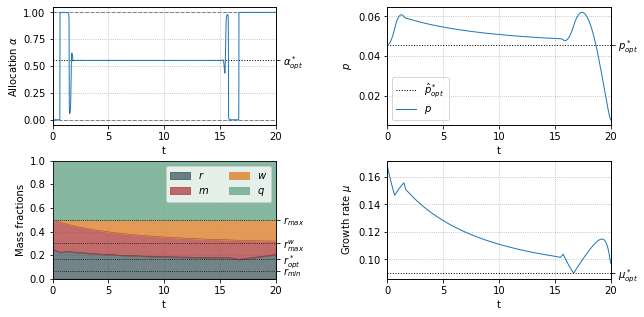

In [7]:
rmax = 0.3
rmax_old = 0.5
rmin = 0.07
umin = rmin/rmax
Em = 0.7; K = 0.003
param = [Em,K,rmax,rmin]

popt = np.sqrt(K*Em)
f = popt/(K + popt)*(popt+1)
uopt = (Em + f*rmin/rmax)/(Em + f)
ropt = uopt*rmax
mopt = (1-uopt)*rmax
muopt = popt/(K + popt)*(ropt-rmin)

solution = bocop.readSolution("./problem3.sol")
t = solution.time_steps
p = solution.state[0]
r = solution.state[1]
m = solution.state[2]
V = solution.state[3]
u = solution.control[0]
q = 1 - r - m
mu = p*(r-rmin)/(K + p)
   
t0 = t[0]; t1 = t[-1]

names = ['p','r','m','\\alpha']

plt.figure(0, figsize=(10,5))
plt.subplot(221)
plt.subplots_adjust(hspace=0.3, wspace=0.5)

plt.grid(linestyle='dotted')
ax = plt.gca()
plt.xlabel('t')
plt.ylabel('Allocation $\\alpha$')
plt.plot([t0,t1],[0,0],linewidth=1,color='grey',linestyle='--')
plt.plot([t0,t1],[1,1],linewidth=1,color='grey',linestyle='--')
plt.plot([t0,t1],[uopt,uopt],linewidth=1, linestyle='dotted', color='black',label='$\\alpha^*_{opt}$')
plt.plot(t[1:],u,linewidth=1,label='$\\alpha$')
ax.set_xlim(t0,t1)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
plt.tick_params(axis='y', which='minor', labelleft='off', labelright='on')
plt.yticks([uopt], ['$\\alpha^*_{opt}$'])

plt.subplot(222)
plt.grid(linestyle='dotted')
ax = plt.gca()
plt.plot([t0,t1],[popt,popt],linewidth=1, linestyle='dotted', color='black',label='$\hat p^*_{opt}$')
plt.plot(t, p, linewidth=1, label='$p$')
plt.legend()
ax.set_xlim(t0,t1)
plt.xlabel('t')
plt.ylabel('$p$')
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
plt.tick_params(axis='y', which='minor', labelleft='off', labelright='on')
plt.yticks([popt], ['$p^*_{opt}$'])

plt.subplot(223)
plt.grid(linestyle='dotted')
plt.xlabel('t')
plt.ylabel('Mass fractions')
ax = plt.gca()
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
plt.tick_params(axis='y', which='minor', labelleft='off', labelright='on')
plt.yticks([rmin,ropt,rmax_old,rmax], ['$r_{min}$','$r^*_{opt}$','$r_{max}$','$r^w_{max}$'])
ax.set_xlim(t[0],t[-1])
plt.fill_between(t, r, color='#374e55', label='$r$', alpha=0.7)
plt.fill_between(t, r, r+m, color='#b24746', label='$m$', alpha=0.8)
plt.fill_between(t, r+m, rmax_old, color='#df8f44', label='$w$', alpha=0.9)
plt.fill_between(t, rmax_old, 1, color='#79af97', label='$q$', alpha=0.9)
plt.plot(t, r, color='#374e55',linewidth=0.5)
plt.plot(t, r+m, color='#b24746',linewidth=0.5)
plt.grid(linestyle='dotted',color='black')
plt.legend(ncol = 2)

plt.subplot(224)
plt.grid(linestyle='dotted')
plt.xlabel('t')
plt.ylabel('Growth rate $\mu$')
ax = plt.gca()
plt.plot([t0,t1],[muopt,muopt],linewidth=1, linestyle='dotted', color='black',label='$\mu^*_{opt}$')
plt.plot(t,mu,linewidth=1,label='$\mu(p,r)$')
ax.set_xlim(t0,t1)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
plt.tick_params(axis='y', which='minor', labelleft='off', labelright='on')
plt.yticks([muopt], ['$\mu^*_{opt}$'])

plt.show()